In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
folder = "C:\\Users\\zuk-8\\Programs\\workspace\\jupiter_notebooks\\Andrea"
fn = "fanta_grades.csv"

In [3]:
# Set canceled matches to NaN
grades = pd.read_csv(os.path.join(folder,fn))
n_players = grades.groupby(["Season", "Giornata", "Team"]).count()["Player"]
canceled_matches = n_players.loc[n_players>15].reset_index()[["Season", "Giornata", "Team"]]

del_index = []
for row in canceled_matches.index:
    ser = canceled_matches.loc[row]
    s, g, t = ser.loc['Season'], ser.loc['Giornata'], ser.loc['Team']
    del_index += grades.query("Season == @s").query("Giornata == @g").query("Team == @t").index.tolist()

grades.set_value(index=del_index, col=["V", "G", "A", "R", "R", "AG", "AM", "ES", "FV"], value=pd.np.NaN)
grades[grades.index.isin(del_index)].head()

grades = grades.rename(columns={'FV':'FantaVoto', 'V':'Voto'})
grades_n = grades.loc[grades['Role']!='P']
grades_p = grades.loc[grades['Role']=='P']
# grades = grades.set_index(["Season", "Giornata", "Team", "Role", "Player"])

In [4]:
# # Check data is correct
# mult_n = pd.Series({'V':1, 'G':3, 'A':1, 'R':0, 'RS':-3, 'AG':-2, 'AM':-0.5, 'ES':-1, 'FV':-1})
# mult_p = pd.Series({'V':1, 'G':1, 'A':1, 'R':3, 'RS':3, 'AG':-1, 'AM':-0.5, 'ES':-1, 'FV':-1})
# pd.concat([grades_n.loc[(grades_n.fillna(0) * mult_n).sum(1) > 0.001],
#            grades_n.loc[(grades_n.fillna(0) * mult_n).sum(1) < -0.001]])
# pd.concat([grades_p.loc[(grades_p.fillna(0) * mult_p).sum(1) > 0.001],
#            grades_p.loc[(grades_p.fillna(0) * mult_p).sum(1) < -0.001]])

C:\Users\zuk-8\Programs\Anaconda3\envs\standard\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


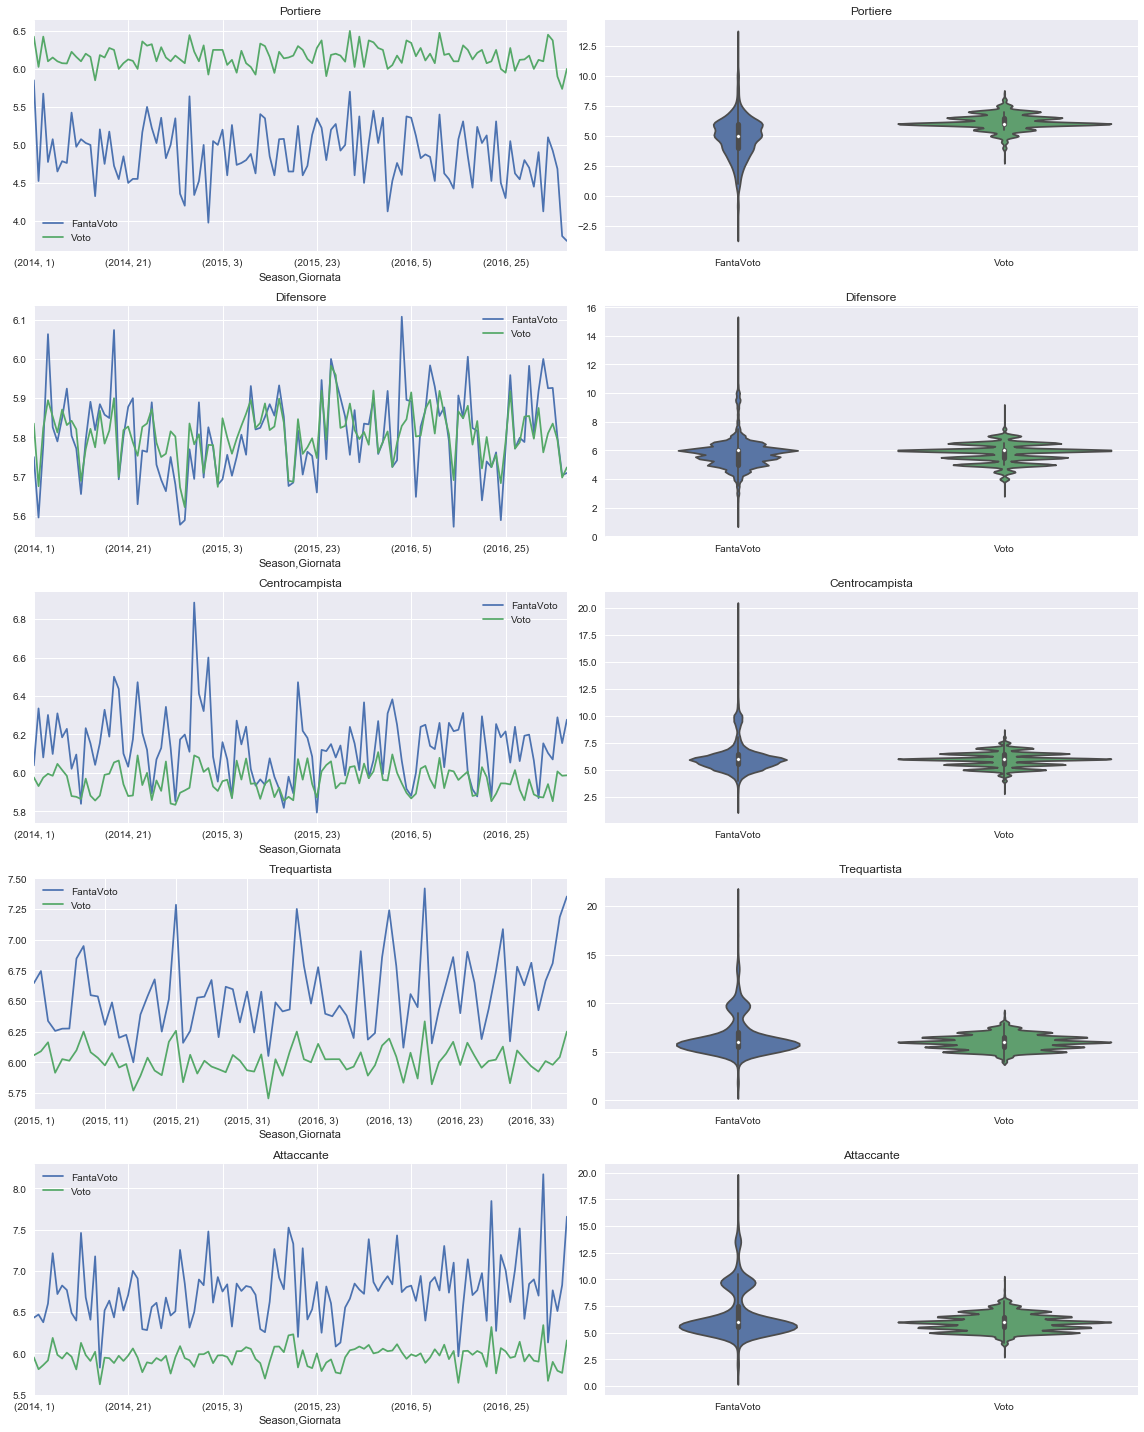

In [7]:
# Roles
grades_by_rg = grades.groupby(['Role', 'Season', 'Giornata']).mean()[['FantaVoto', 'Voto']]
grades_by_rgp = grades.groupby(['Role', 'Season', 'Giornata', 'Player']).mean()[['FantaVoto', 'Voto']]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
grades_by_rg.loc['P'].plot(ax=axes[0,0])
grades_by_rg.loc['D'].plot(ax=axes[1,0])
grades_by_rg.loc['C'].plot(ax=axes[2,0])
grades_by_rg.loc['T'].plot(ax=axes[3,0])
grades_by_rg.loc['A'].plot(ax=axes[4,0])

sns.violinplot(grades_by_rgp.loc['P'], ax=axes[0,1])
sns.violinplot(grades_by_rgp.loc['D'], ax=axes[1,1])
sns.violinplot(grades_by_rgp.loc['C'], ax=axes[2,1])
sns.violinplot(grades_by_rgp.loc['T'], ax=axes[3,1])
sns.violinplot(grades_by_rgp.loc['A'], ax=axes[4,1])

axes[0,0].set_title('Portiere')
axes[1,0].set_title('Difensore')
axes[2,0].set_title('Centrocampista')
axes[3,0].set_title('Trequartista')
axes[4,0].set_title('Attaccante')
axes[0,1].set_title('Portiere')
axes[1,1].set_title('Difensore')
axes[2,1].set_title('Centrocampista')
axes[3,1].set_title('Trequartista')
axes[4,1].set_title('Attaccante')

plt.tight_layout()

In [38]:
class Player(object):
    
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return '<Player: {n}: {r} at {t}>'.format(n=self.name, r=self.role, t=self.teams[-1])
    
    @property
    def _data_player(self):
        name = self.name
        return grades.query('Player == @name')
    
    @property
    def teams(self):
        return self._data_player.Team.unique().tolist()
    
    @property
    def role(self):
        return self._data_player.Role.unique().tolist()[0]
    
    @property
    def _grades(self):
        return self._data_player.set_index(['Season', 'Giornata'])[['Voto', 'G', 'A', 'R', 'RS', 'AG', 'AM', 'ES', 'FantaVoto']]

    @property
    def grades(self):
        return self._grades['Voto']

    @property
    def fantagrades(self):
        return self._grades['FantaVoto']

    @property
    def all_grades(self):
        return self._grades[['Voto', 'FantaVoto']]
    
    def plot(self, propert, *args, **kwargs):
        title = self.__repr__()[1:-1]
        lines = getattr(self, propert)
        return lines.plot(title=title, *args, **kwargs)


<Player: Gastaldello D.: D at bologna>


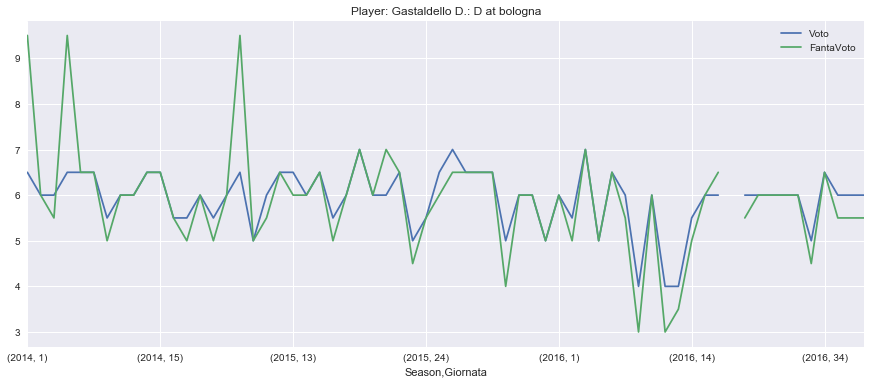

In [40]:
pl = Player('Gastaldello D.')
print(pl)
ax = pl.plot('all_grades', figsize=(15,6))